In [1]:
#knn
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:

dataset = pd.read_csv("class C.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.67     0             0.70               3   
1                   0.67     0             0.70               3   
2                   0.71     0             0.50               4   
3                   0.68     0             0.54               4   
4                   0.71     0             0.63               3   
...                  ...   ...              ...             ...   
7494                1.00     0             0.76               6   
7495                0.93     0             0.95               5   
7496                0.93     0             0.95               5   
7497                0.94     0             0.80               5   
7498                0.95     0             0.96               5   

      average_montly_hours  time_spend_company  Work_accident  \
0                      149                   3              0   
1                      149         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     7499 non-null   float64
 1   left                   7499 non-null   int64  
 2   last_evaluation        7499 non-null   float64
 3   number_project         7499 non-null   int64  
 4   average_montly_hours   7499 non-null   int64  
 5   time_spend_company     7499 non-null   int64  
 6   Work_accident          7499 non-null   int64  
 7   promotion_last_5years  7499 non-null   int64  
 8   Department             7499 non-null   object 
 9   salary                 7499 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 586.0+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.812311,0.130417,0.763606,3.909321,205.290172,3.547940,0.159088,0.042539
std,0.114183,0.336785,0.160277,0.919857,44.654240,1.621307,0.365782,0.201829
min,0.110000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.740000,0.000000,0.630000,3.000000,167.000000,2.000000,0.000000,0.000000
50%,0.820000,0.000000,0.780000,4.000000,210.000000,3.000000,0.000000,0.000000
75%,0.900000,0.000000,0.900000,5.000000,244.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


<AxesSubplot:>

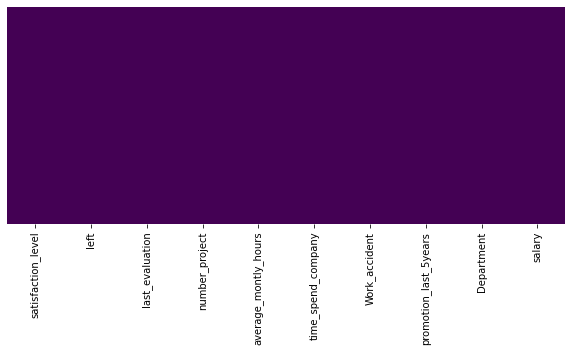

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='left', ylabel='count'>

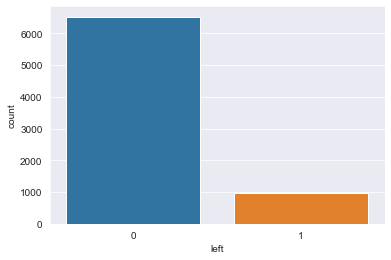

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True) 


In [8]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [9]:

dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                              prefix ='salary') 
# Adding these dummy variable to input X 
X = pd.concat([x,dum_Department, dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(7499, 20)
(7499,)


In [10]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.92266667 0.97466667 0.952      0.95733333 0.956      0.95066667
 0.96266667 0.96       0.96266667 0.94659546]


In [11]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9545262127280818
